## 导入依赖

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import random

print(tf.__version__)

2.4.1


## 下载 MNIST 数据集

MNIST 数据集包含 60,000 训练图片和 10,000 测试图片。

每张 MNIST 数据集图片是 28x28 的灰度图。

![MNIST sample](https://github.com/khanhlvg/DigitClassifier/raw/master/images/mnist.png)

In [2]:
# Keras 提供了便捷的 API 下载 MNIST 数据集, 并切分为训练和测试集。
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(f'train_iamge type:{type(train_images)} shape:{train_images.shape}')
print(f'train_labels type:{type(train_labels)} shape:{train_labels.shape}')
print(train_images[0])
print(train_labels[0])

train_iamge type:<class 'numpy.ndarray'> shape:(60000, 28, 28)
train_labels type:<class 'numpy.ndarray'> shape:(60000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253

In [3]:
# 标准化输入图像，以使每个像素值在0到1之间。
train_images = train_images / 255.0
test_images = test_images / 255.0
print('Pixels are normalized')

Pixels are normalized


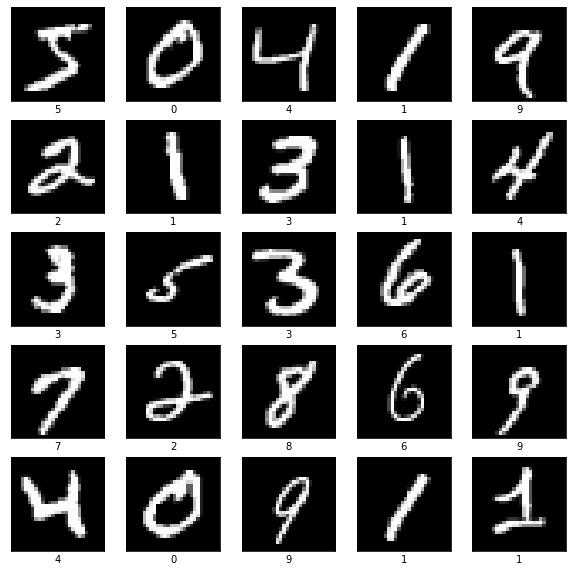

In [4]:
# 显示训练集中的前 25 张图片。
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.gray)
  plt.xlabel(train_labels[i])
plt.show()

## 训练模型

接下来，我们使用 Keras API 构建 TensorFlow 模型，并在 MNIST 训练数据集上对其进行训练。 训练后，我们的模型将能够对数字图像进行分类。

我们的模型将**28px x 28px灰度图像** 作为输入，并输出 **长度为 10** 的浮点数组，代表图像从 0 到 9 的数字的概率。

在这里，我们使用一个简单的卷积神经网络，这是计算机视觉中的一种常用技术。

In [5]:
# 定义模型
model = keras.Sequential([
  keras.layers.InputLayer(input_shape=(28, 28)),
  keras.layers.Reshape(target_shape=(28, 28, 1)),
  keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.nn.relu),
  keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Dropout(0.25),
  keras.layers.Flatten(),
  keras.layers.Dense(10)
])

# 定义如何训练模型
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 查看模型
model.summary()

# 训练模型
model.fit(train_images, train_labels, epochs=5)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                9

## 评估模型

我们针对模型在训练过程中未见过的“测试”数据集运行数字分类模型，以确认该模型不仅记住了所看到的数字，而且还很好地泛化了新图像。

In [6]:
# 使用测试数据集中的所有图像评估模型。
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.0455 - accuracy: 0.9878
Test accuracy: 0.9878000020980835


尽管我们的模型相对简单，但是我们能够在模型从未见过的新图像上达到98％左右的良好准确性。下面，让我们可视化结果。

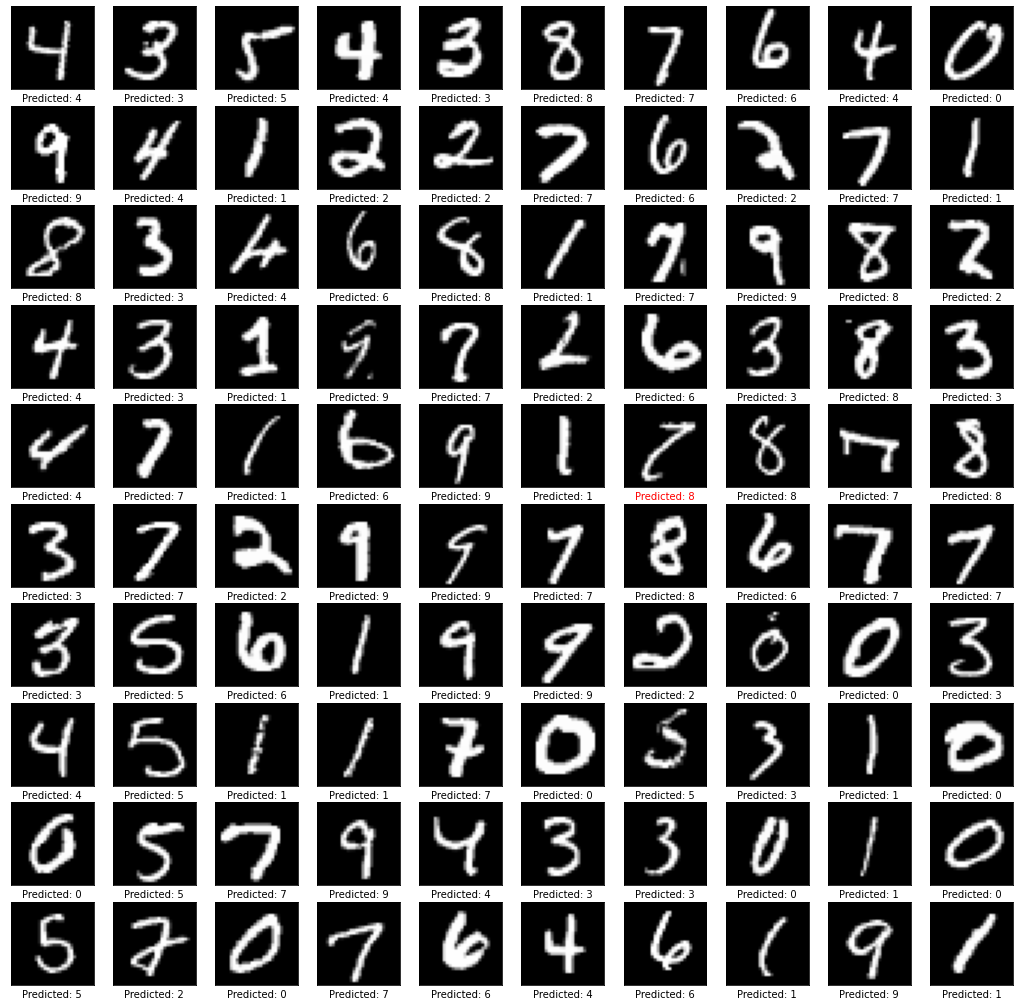

In [7]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Predict the labels of digit images in our test dataset.
predictions = model.predict(test_images)

# As the model output 10 float representing the probability of the input image
# being a digit from 0 to 9, we need to find the largest probability value
# to find out which digit the model predicts to be most likely in the image.
prediction_digits = np.argmax(predictions, axis=1)

# Then plot 100 random test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(18, 18))
for i in range(100):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  image_index = random.randint(0, len(prediction_digits))
  plt.imshow(test_images[image_index], cmap=plt.cm.gray)
  ax.xaxis.label.set_color(get_label_color(prediction_digits[image_index],\
                                           test_labels[image_index]))
  plt.xlabel('Predicted: %d' % prediction_digits[image_index])
plt.show()

## 将Keras模型转换为TensorFlow Lite

现在我们已经训练了数字分类器模型，我们将其转换为 TensorFlow Lite 格式以进行移动部署。

In [8]:
# Convert Keras model to TF Lite format.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_float_model = converter.convert()

# Show model size in KBs.
float_model_size = len(tflite_float_model) / 1024
print('Float model size = %dKBs.' % float_model_size)

INFO:tensorflow:Assets written to: /var/folders/_l/w8pcb81s2xn_73qp7547mld00000gp/T/tmpdieg0t_a/assets
Float model size = 436KBs.


当我们将模型部署到移动设备上时，我们希望模型尽可能小且尽可能快。**Quantization**是机器学习中经常使用的一种常见技术，用于缩小 ML 模型。 在这里，我们将使用 8 位数字逼近我们的 32 位权重，从而将模型大小缩小 4 倍。

请参阅 [TensorFlow文档](https://www.tensorflow.org/lite/performance/post_training_quantization) 以了解有关其他量化技术的更多信息。

In [9]:
# Re-convert the model to TF Lite using quantization.
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

# Show model size in KBs.
quantized_model_size = len(tflite_quantized_model) / 1024
print('Quantized model size = %dKBs,' % quantized_model_size)
print('which is about %d%% of the float model size.'\
      % (quantized_model_size * 100 / float_model_size))
mobile_tflite_quantized_path = f"mnist_quantized.tflite"
open(mobile_tflite_quantized_path, "wb").write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/_l/w8pcb81s2xn_73qp7547mld00000gp/T/tmplbl6689u/assets


INFO:tensorflow:Assets written to: /var/folders/_l/w8pcb81s2xn_73qp7547mld00000gp/T/tmplbl6689u/assets


Quantized model size = 114KBs,
which is about 26% of the float model size.


117088

## 评估TensorFlow Lite模型

通过使用量化，我们通常会牺牲一些精度，以获取模型明显较小的好处。让我们计算量化模型的准确性下降。

In [10]:
# A helper function to evaluate the TF Lite model using "test" dataset.
def evaluate_tflite_model(tflite_model):
  # Initialize TFLite interpreter using the model.
  interpreter = tf.lite.Interpreter(model_content=tflite_model)
  interpreter.allocate_tensors()
  input_tensor_index = interpreter.get_input_details()[0]["index"]
  output = interpreter.tensor(interpreter.get_output_details()[0]["index"])

  # Run predictions on every image in the "test" dataset.
  prediction_digits = []
  for test_image in test_images:
    # Pre-processing: add batch dimension and convert to float32 to match with
    # the model's input data format.
    test_image = np.expand_dims(test_image, axis=0).astype(np.float32)
    interpreter.set_tensor(input_tensor_index, test_image)

    # Run inference.
    interpreter.invoke()

    # Post-processing: remove batch dimension and find the digit with highest
    # probability.
    digit = np.argmax(output()[0])
    prediction_digits.append(digit)

  # Compare prediction results with ground truth labels to calculate accuracy.
  accurate_count = 0
  for index in range(len(prediction_digits)):
    if prediction_digits[index] == test_labels[index]:
      accurate_count += 1
  accuracy = accurate_count * 1.0 / len(prediction_digits)

  return accuracy

# Evaluate the TF Lite float model. You'll find that its accurary is identical
# to the original TF (Keras) model because they are essentially the same model
# stored in different format.
float_accuracy = evaluate_tflite_model(tflite_float_model)
print('Float model accuracy = %.4f' % float_accuracy)

# Evalualte the TF Lite quantized model.
# Don't be surprised if you see quantized model accuracy is higher than
# the original float model. It happens sometimes :)
quantized_accuracy = evaluate_tflite_model(tflite_quantized_model)
print('Quantized model accuracy = %.4f' % quantized_accuracy)
print('Accuracy drop = %.4f' % (float_accuracy - quantized_accuracy))


Float model accuracy = 0.9878
Quantized model accuracy = 0.9878
Accuracy drop = 0.0000
